# Example - 13 - Venus Aerocapture - Part 5a: Monte Carlo Simulations

In this example, we will demonstrate the application of aerocapture for SmallSat missions to Venus.

We analyze the design proposed by "Austin et al. SmallSat Aerocapture to Enable a New Paradigm of Planetary Missions, IEEE Aerospace Conference, 2019, Big Sky, MT. DOI: 10.1109/AERO.2019.8742220

Shown below is the aerocapture vehicle design for Venus SmallSat proposed by Austin et al. The design consists of a drag skirt (shown in green), which is jettisoned. The vehicle parameters are $m = 68.1$ kg, $\beta_1 = 38.1$ kg/m2, $\beta_2/\beta_1 = 7.5$. The objective is to insert the small satellite (shown in brown) into a 2,000 km x 200 km orbit around Venus. We will use AMAT to perform Monte Carlo analysis to assess aerocapture performance.

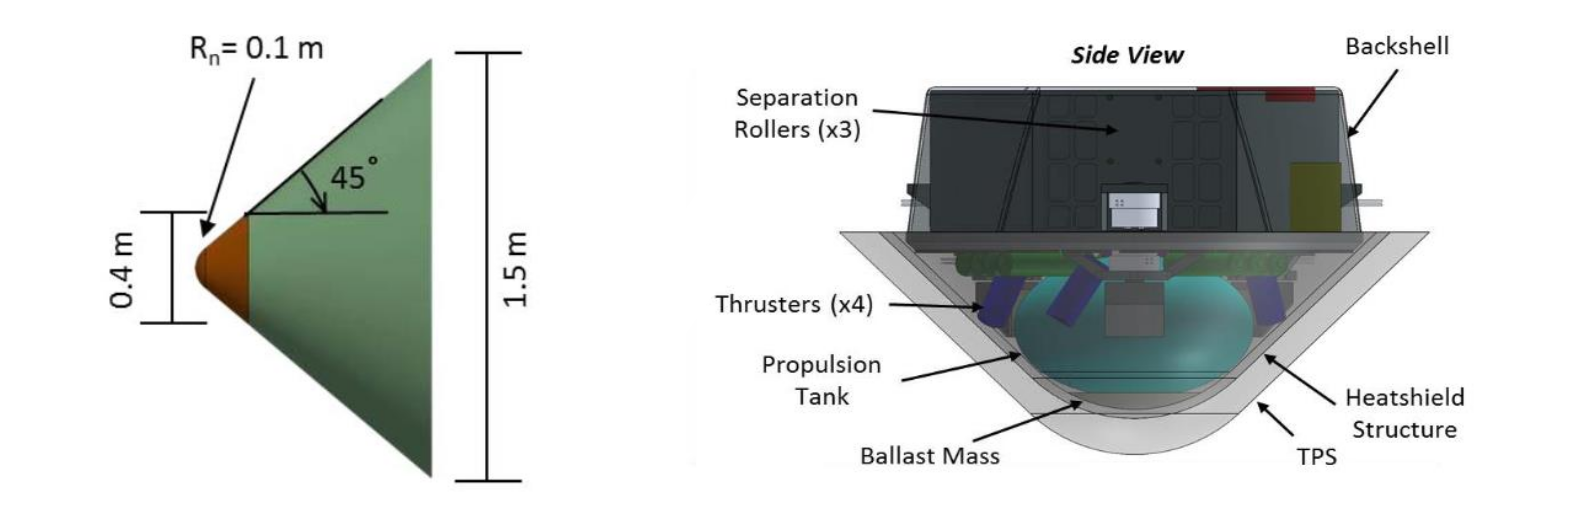

In [3]:
from IPython.display import Image
Image(filename='../plots/drag-modulation-vehicle.png', width=800)

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("VENUS")    
planet.loadAtmosphereModel('../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 150000.0 

# Set up the drag modulation vehicle.
vehicle=Vehicle('DMVehicle', 68.2, 38.1, 0.0, 3.1416, 0.0, 0.10, planet)
vehicle.setInitialState(150.0,0.0,0.0,11.0,0.0,-5.50,0.0,0.0)
vehicle.setSolverParams(1E-6)
vehicle.setDragModulationVehicleParams(38.1,7.5)

# Set up the drag modulation entry phase guidance parameters.
vehicle.setDragEntryPhaseParams(6.0, 80.0, 101, -300.0)

# Set the target orbit parameters.
vehicle.setTargetOrbitParams(200.0, 2000.0, 50.0)

# Define the path to atmospheric files to be used for the Monte Carlo simulations.
atmfiles = ['../atmdata/Venus/LAT80S.txt', 
            '../atmdata/Venus/LAT60S.txt',
            '../atmdata/Venus/LAT40S.txt',  
            '../atmdata/Venus/LAT20S.txt',
            '../atmdata/Venus/LAT10S.txt',
            '../atmdata/Venus/LAT80N.txt',  
            '../atmdata/Venus/LAT60N.txt',
            '../atmdata/Venus/LAT40N.txt',
            '../atmdata/Venus/LAT20N.txt',
            '../atmdata/Venus/LAT10N.txt', 
]

# Set up the Monte Carlo simulation for drag modulation.
# NPOS = 151, NMONTE = 200
# Target EFPA = -5.40 deg
# EFPA 1-sigma error = +/- 0.033 deg
# Nominal beta_1 = 38.1 kg/m2
# beta_1 1-sigma = 0.0
# guidance time step for entry = 0.1s (Freq. = 10 Hz)
# guidance time step after jettison = 1.0 s
# max. solver time step = 0.1 s
# max. time used by solver = 1200 s

vehicle.setupMonteCarloSimulationD(151, 200, atmfiles,0, 1, 2, 3, 4, True,
                                   -5.40,  0.033, 38.1, 0.0,
                                    0.1, 1.0, 0.1, 1200.0)

In [4]:
# N = 10 shown here, run for a few thousand to be realistic. This will take several hours.

vehicle.runMonteCarloD(10, '../data/austin2019/MCB1')

BATCH :../data/austin2019/MCX1, RUN #: 1, PROF: ../atmdata/Venus/LAT10N.txt, SAMPLE #: 51, EFPA: -5.43, SIGMA: -1.67, APO : 2881.64
BATCH :../data/austin2019/MCX1, RUN #: 2, PROF: ../atmdata/Venus/LAT40S.txt, SAMPLE #: 77, EFPA: -5.41, SIGMA: 0.10, APO : 2290.41
BATCH :../data/austin2019/MCX1, RUN #: 3, PROF: ../atmdata/Venus/LAT80N.txt, SAMPLE #: 108, EFPA: -5.43, SIGMA: 2.31, APO : 4615.14
BATCH :../data/austin2019/MCX1, RUN #: 4, PROF: ../atmdata/Venus/LAT60S.txt, SAMPLE #: 195, EFPA: -5.41, SIGMA: 1.61, APO : 2753.68
BATCH :../data/austin2019/MCX1, RUN #: 5, PROF: ../atmdata/Venus/LAT40S.txt, SAMPLE #: 194, EFPA: -5.40, SIGMA: 0.26, APO : 2283.65
BATCH :../data/austin2019/MCX1, RUN #: 6, PROF: ../atmdata/Venus/LAT80N.txt, SAMPLE #: 61, EFPA: -5.37, SIGMA: -1.13, APO : 2059.74
BATCH :../data/austin2019/MCX1, RUN #: 7, PROF: ../atmdata/Venus/LAT20N.txt, SAMPLE #: 126, EFPA: -5.38, SIGMA: -0.53, APO : 2918.58
BATCH :../data/austin2019/MCX1, RUN #: 8, PROF: ../atmdata/Venus/LAT80N.txt,

Shown below is the apoapsis dispersion for 1000 runs. 

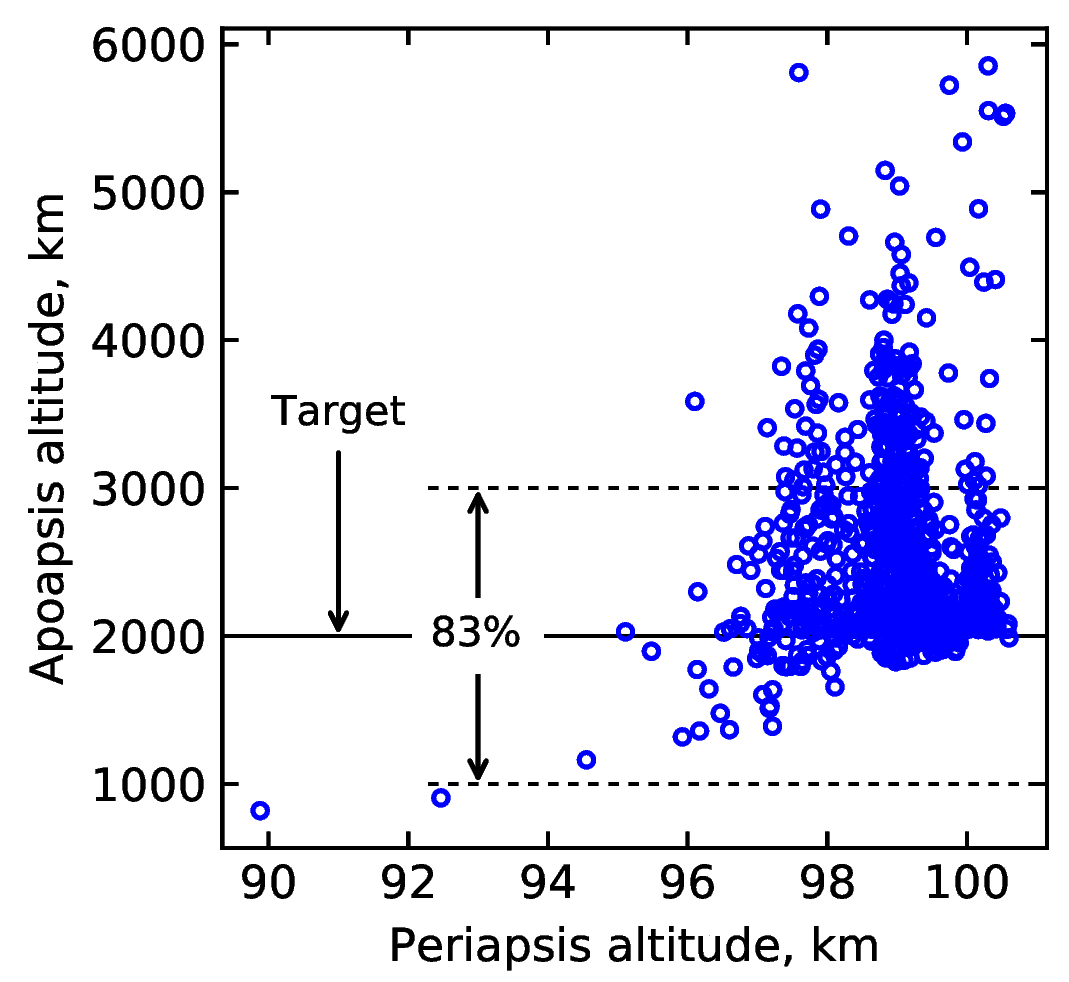

In [5]:
from IPython.display import Image
Image(filename='../plots/austin-drag-modulation-N1000.png', width=600)

No cases resulted in escape or crashing into the planet. 3 of 1000 cases resulted in apoapsis exceeding 6000 km.

Shown below is the heating rate and g-load dispersion.

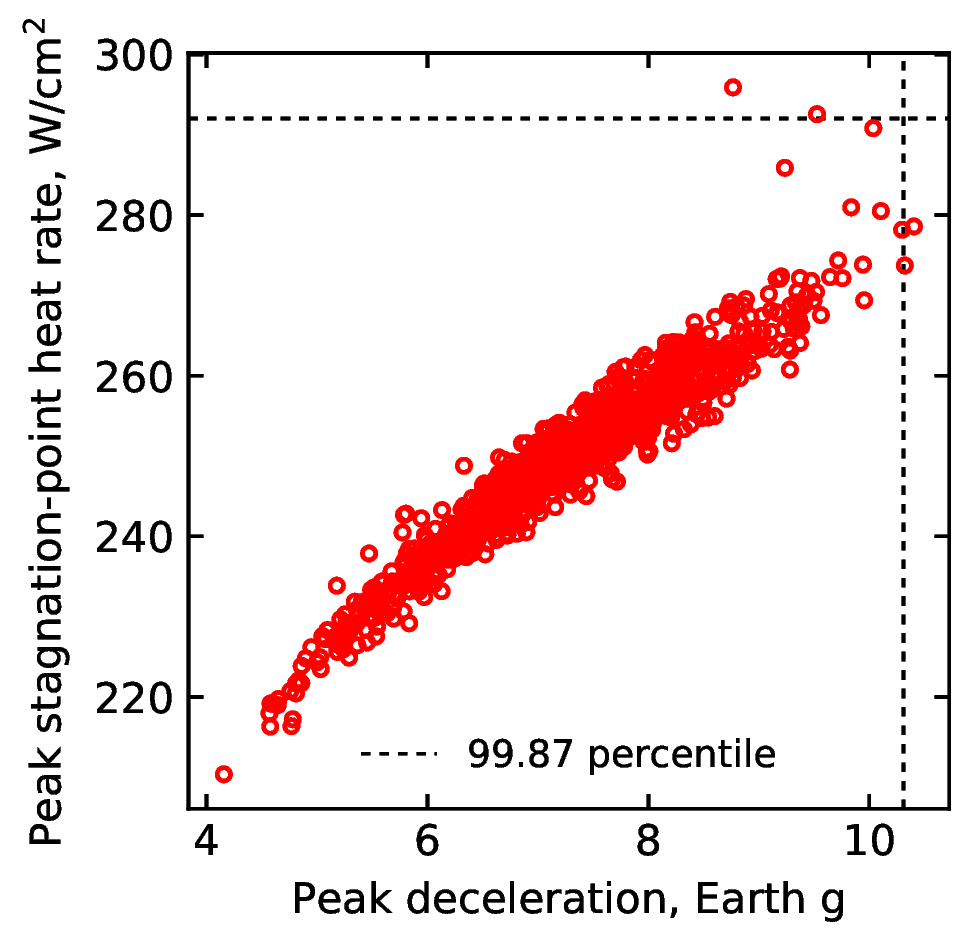

In [6]:
from IPython.display import Image
Image(filename='../plots/austin-drag-modulation-heat.png', width=600)